## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, ****BoomBikes**** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Understanding the Data, Data quality checks and Cleanup

In [814]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [818]:
# Read the bike data
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [820]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [822]:
# describing the columns of dataframe

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [824]:
# Check the shape of dataframe
print(bike_data.shape)

(730, 16)


In [826]:
# check for null values
bike_data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [828]:
# Check for duplicate data
bike_data.duplicated().sum()

0

# Removing redundant & unnecessary columns

Based on data dictionary and high level observation, the following columns can be removed:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can remove this column.

3.  **casual & registered** : Our objective is to find the total count of bikes which is represented by cnt column so we can remove the further seggration of the same count based on registered and casual users


In [832]:
# Create a backup of the original data before making changes
bike_data_bk = bike_data.copy()

In [834]:
# Remove the unnecessary columns
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [836]:
# print the new shape of the bike data
print(bike_data.shape)

(730, 12)


# Creating Dummy Variables

## Convert 'mnth', 'weekday', 'season' & 'weathersit' to category type befor dummy variable creation

In [840]:
# Converting to category type
bike_data['season']=bike_data['season'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')

In [842]:
# Create dummy variables for categorical columns, drop the original column and drop the first column as it can be referred from other columns
bike_data = pd.get_dummies(bike_data, drop_first=True,dtype=int)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int32  
 9   season_3      730 non-null    int32  
 10  season_4      730 non-null    int32  
 11  mnth_2        730 non-null    int32  
 12  mnth_3        730 non-null    int32  
 13  mnth_4        730 non-null    int32  
 14  mnth_5        730 non-null    int32  
 15  mnth_6        730 non-null    int32  
 16  mnth_7        730 non-null    int32  
 17  mnth_8        730 non-null    int32  
 18  mnth_9        730 non-null    

In [844]:
bike_data.shape

(730, 30)

In [998]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Observations :
Dataset initially had 730 rows and 16 columns.

Except one column, all other are either float or integer type.

There seems to be some fields that are categorical in nature, but they are in integer/float type. Based on further analysis we will see if they should be converted to categorical types are remain as numeric types

There are no null values and no duplicate data present

After removing instant, dteday, casual and registered columns the data had 730 rows and 12 columns

We converted 'mnth', 'weekday', 'season' & 'weathersit' to categorical columns and created dummy variables for them, post which the new shape of data is 730 rows and 30 columns


#### Data Splitting

In [849]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.70, random_state = 100)

In [851]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


In [853]:
df_train.shape

(510, 30)

In [855]:
df_test.shape

(220, 30)

#### Perform EDA on TRAINING Dataset.

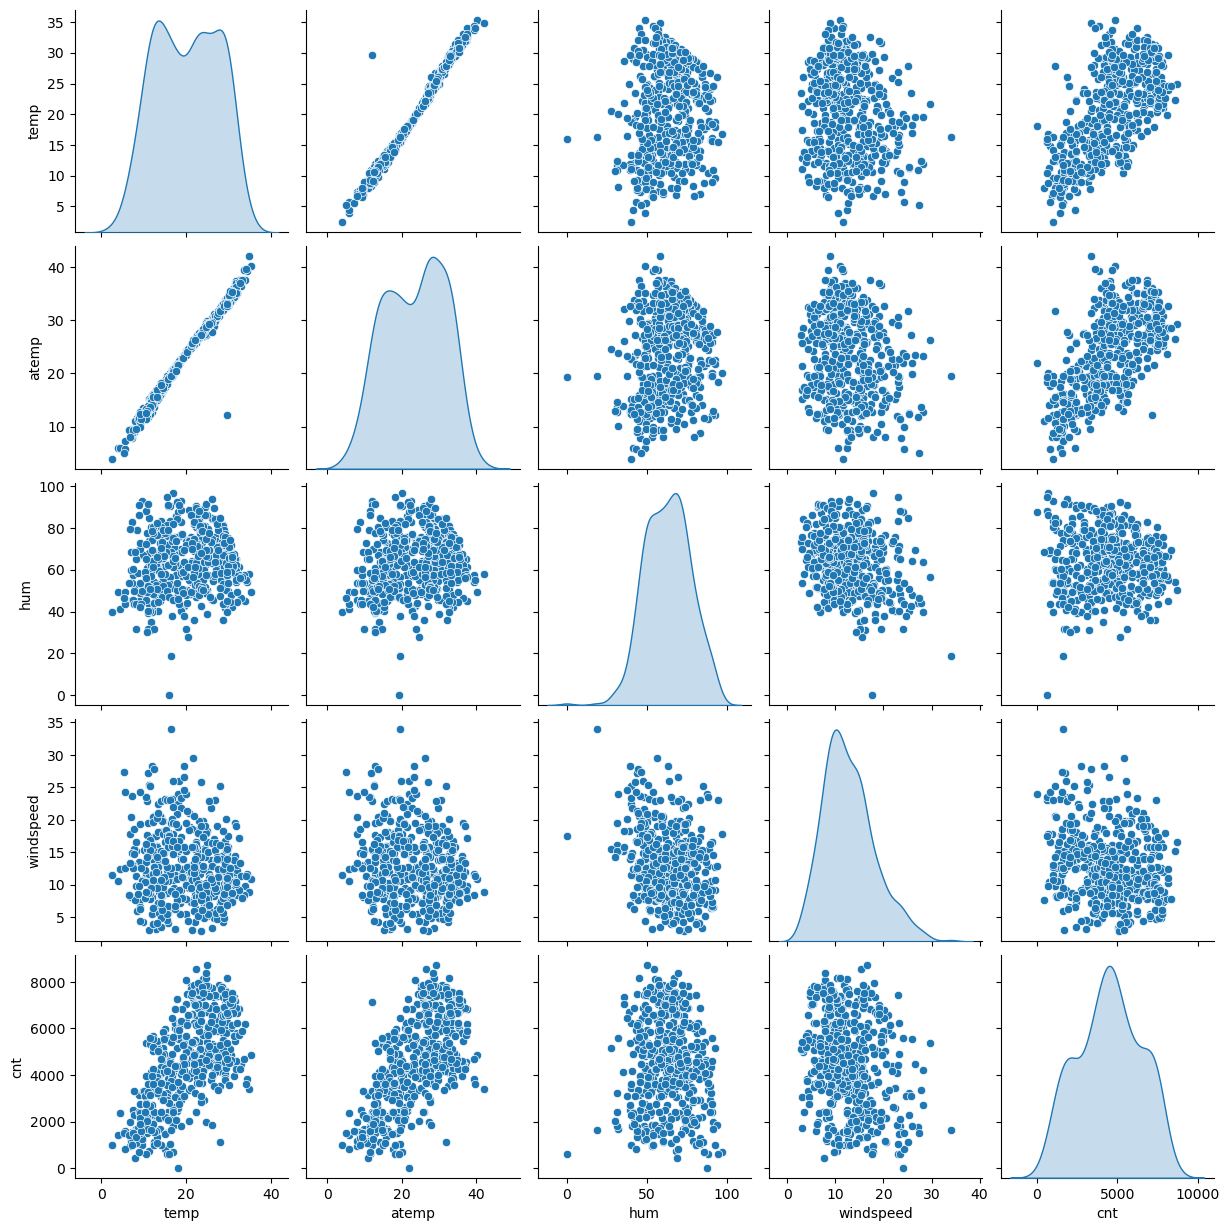

In [858]:
# Pairplot to visualize numeric data
bike_data_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_data_num, diag_kind='kde')
plt.show()

### Observataion
#### There is linear relationship between atemp, temp and cnt variables

#### Correlation
##### We will refer to the correlation matrix while building the model

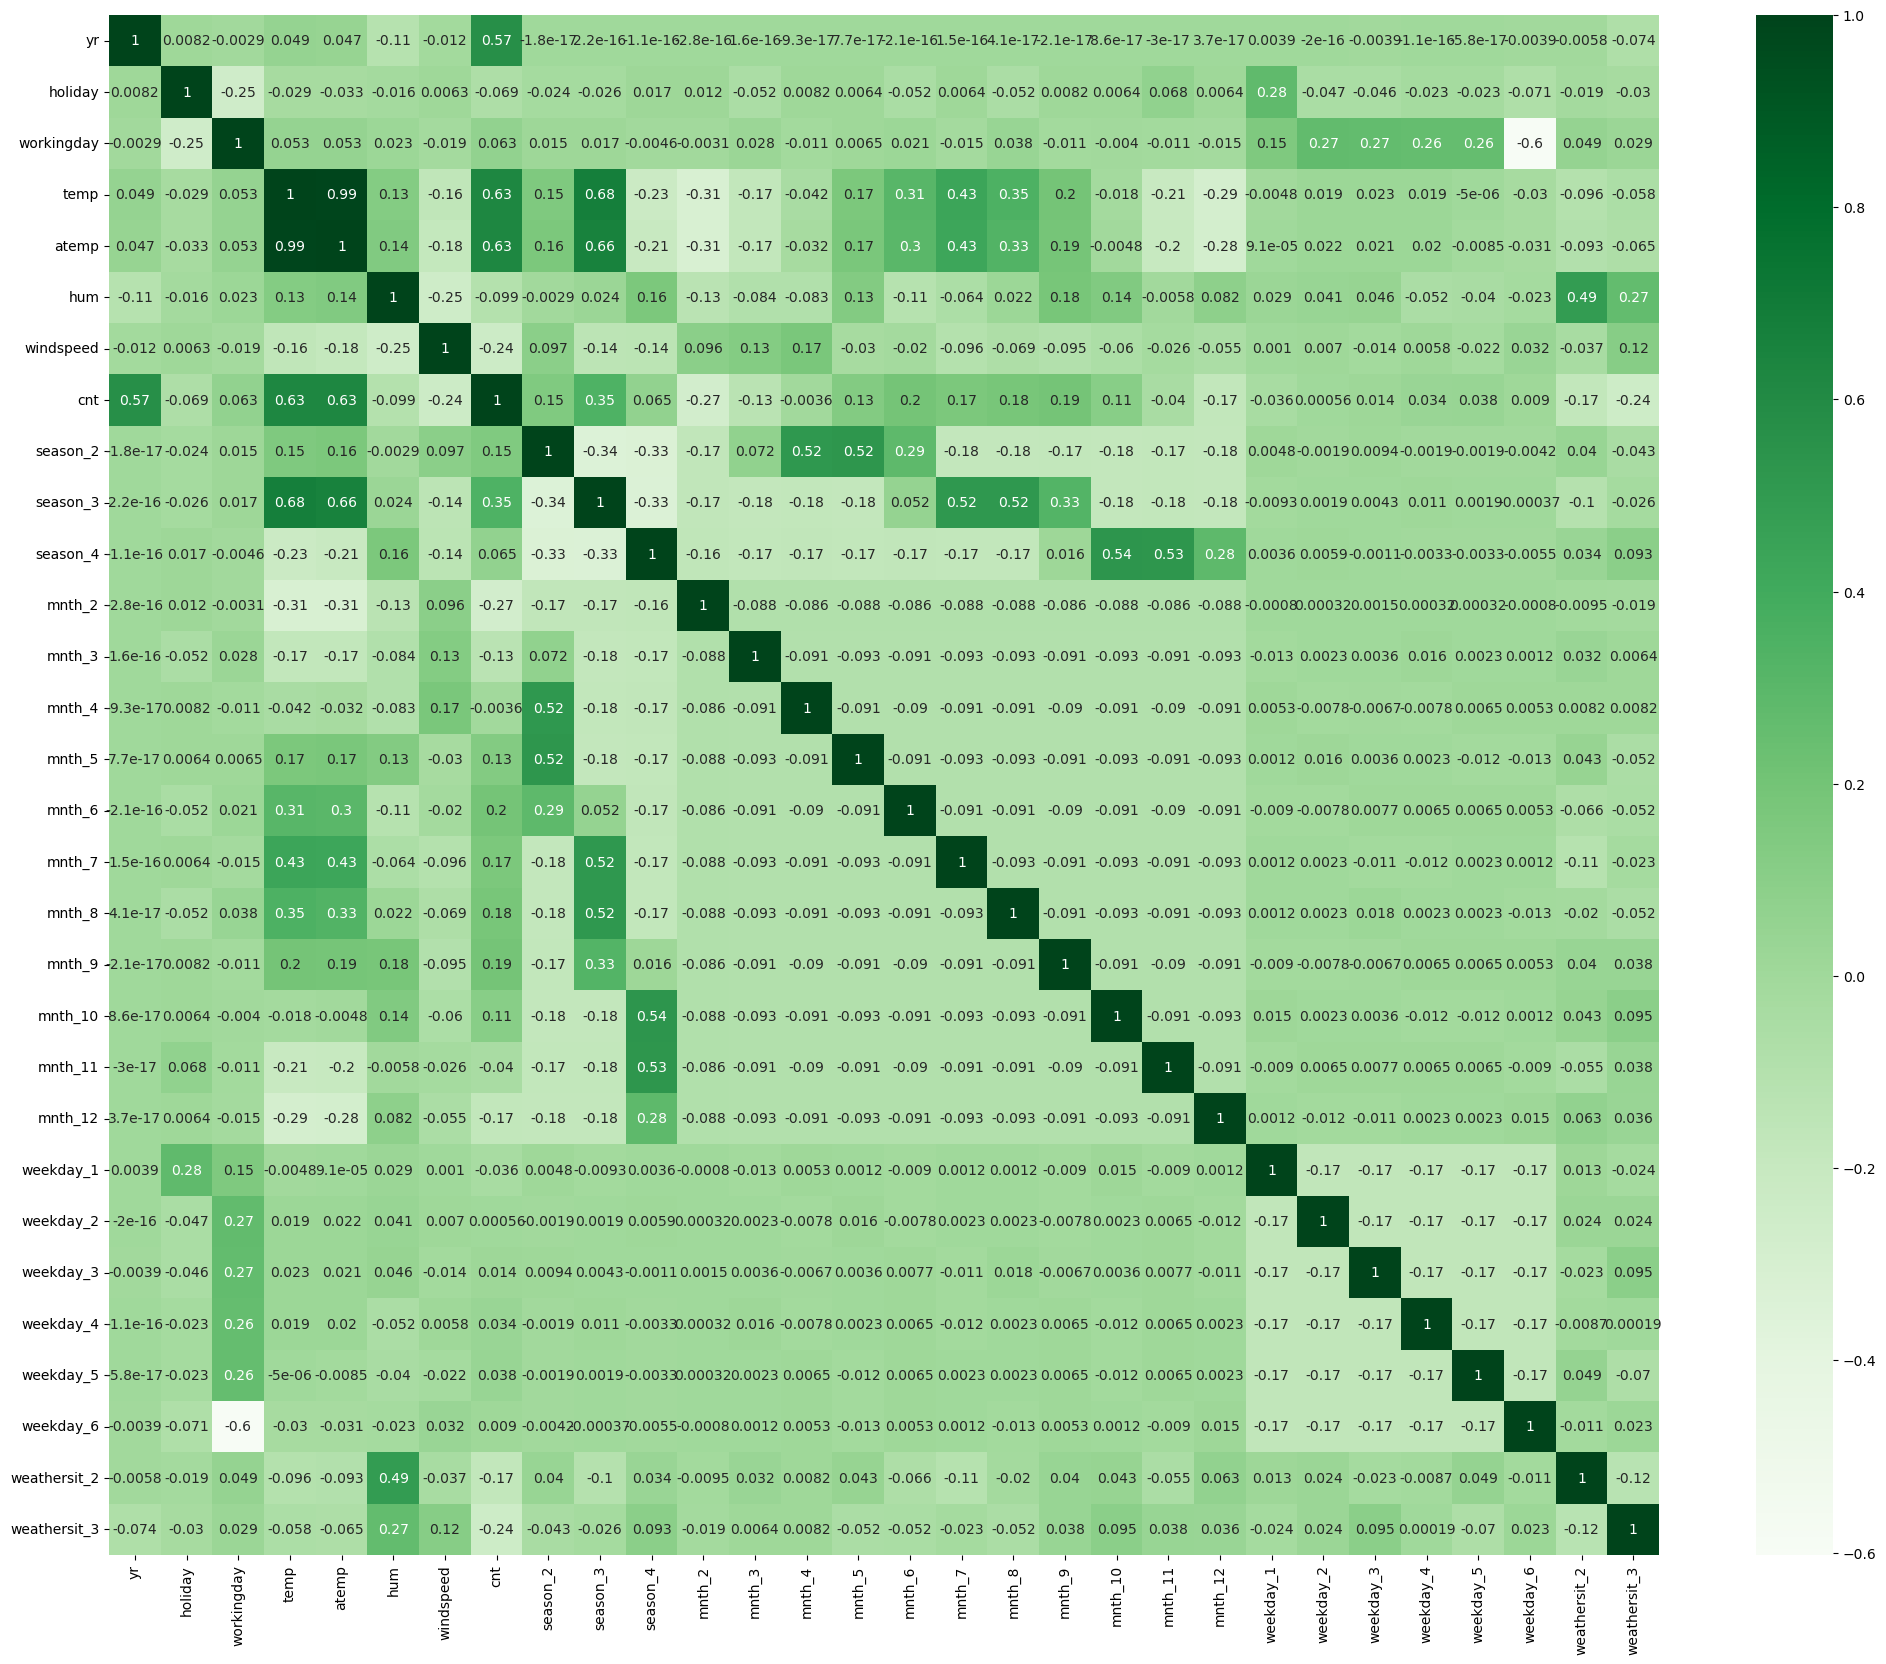

In [861]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_data.corr(), annot = True, cmap='Greens')
plt.show()

#### Many variables have high corelations. We will use RFE for feature elimination and VIF to remove the multicollinearity

#### SCALING THE FEATURES

In [864]:
scaler = MinMaxScaler()

In [865]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [866]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [867]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build the MODEL

In [869]:
y_train = df_train.pop('cnt')
X_train = df_train

In [870]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Use RFE for feature elimination

In [872]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [874]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [884]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [886]:
# Columns which RFE did not select
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [888]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### VIF Check for Multicollinearity

In [891]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


#### Build a model using Stats model for detailed statistics

In [894]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit() # Running the linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.17e-191
Time:                        22:09:10   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

#### Removing the variable season_3 based on high p value and high VIF

In [897]:
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

#### VIF Check

In [900]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


#### Building second model post dropping season_3

In [903]:
# Add the constant for stats model
X_train_lm2 = sm.add_constant(X_train_new)

In [905]:
# Build the second model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.70e-192
Time:                        22:09:32   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

### Removing the variable hum based high VIF

In [908]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [910]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

#### VIF Check

In [913]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


#### Building third model post dropping hum

In [916]:
# Add the constant for stats model
X_train_lm3 = sm.add_constant(X_train_new)

In [918]:
# Create the model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.97e-188
Time:                        22:09:59   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914   

#### Removing the variable mnth_10 based on higher p value

In [921]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

#### VIF Check

In [924]:
# VIF Check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


#### Building fourth model post dropping mnth_10

In [927]:
# Add the constant for stats model
X_train_lm4 = sm.add_constant(X_train_new)

In [929]:
# Create the model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.64e-189
Time:                        22:10:25   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740   

#### As there is high co-relation between temp and cnt, we should not remove this variable although the VIF is above 5, but lets test the impact of its removal

In [932]:
X_train_new_bk = X_train_new.copy()
X_train_new = X_train_new.drop(["temp"], axis = 1)

#### VIF Check post removal of temp

In [935]:
# VIF Check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.53
3,windspeed,3.41
0,yr,1.91
4,season_2,1.61
8,weekday_6,1.61
9,weathersit_2,1.54
5,season_4,1.49
6,mnth_8,1.23
7,mnth_9,1.15
1,holiday,1.10


#### Building fifth model post dropping temp

In [937]:
X_train_lm5 = sm.add_constant(X_train_new)

In [939]:
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     85.70
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.42e-107
Time:                        22:13:33   Log-Likelihood:                 309.79
No. Observations:                 510   AIC:                            -595.6
Df Residuals:                     498   BIC:                            -544.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3673      0.022     16.529   

#### The R2 and Adjusted R2 are dropped from around 84 % to about 65 %. This means that temp variable is a singificant predictor variable for the cnt target variable. So we can't remove this and use the lr6 model.

### Lets select the previous model lr4 as the final model as it has low multicollinearity and p-values are significant

## Printing the final model lr4 summary and params

In [944]:
print(lr4.summary())
print(lr4.params)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.64e-189
Time:                        22:15:00   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740   

## Final Model Interpretation
- F-Statistics value of 217.0 (which is greater than 1) and the prob-value of it is 8.64e-189 i.e almost equals to zero, states that the overall model is significant
- R-squared is 0.840 and Adjusted R-sqaured is 0.836


lr4 model coefficient values
- const           0.090297
- yr              0.232711
- holiday        -0.056011
- workingday      0.046317
- temp            0.518828
- windspeed      -0.150835
- season_2        0.100362
- season_4        0.138202
- mnth_8          0.050952
- mnth_9          0.113626
- weekday_6       0.056927
- weathersit_2   -0.083049
- weathersit_3   -0.287225   -0.287225

#### Insights
From the lr4 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

## The equation of best fitted surface based on model lr6:

cnt = 0.090297 + (**yr** × 0.232711) - (**holiday** × 0.056011)+ (**workingday** × 0.046317) + (**temp** × 0.518828) − (**windspeed** × 0.150835) + (**season2** × 0.100362) + (**season4** ×0.138202) + (**mnth8** × 0.050952) + (**mnth9** × 0.113626) + (**weekday6** ×0.056927) - (**weathersit_2** × 0.083049) − (**weathersit3** × 0.287225)

#### Based on the above equation, the temp variable with co-efficient 0.518828 strongly increases the bike hire along with other variables as per their co-efficients. The bike hire is negatively impacted by increase in windspeed, holiday, weathersit2 and weathersit3

#### Residual Analysis of the train data and validation

In [953]:
X_train_lm4

,const,yr,holiday,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,1,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,0,1,1,0
79,1.0,0,0,1,0.462664,0.529881,1,0,0,0,0,1,0


In [955]:
y_train_pred = lr4.predict(X_train_lm4)

#### Noramal distribution of error terms

Text(0.5, 0, 'Errors')

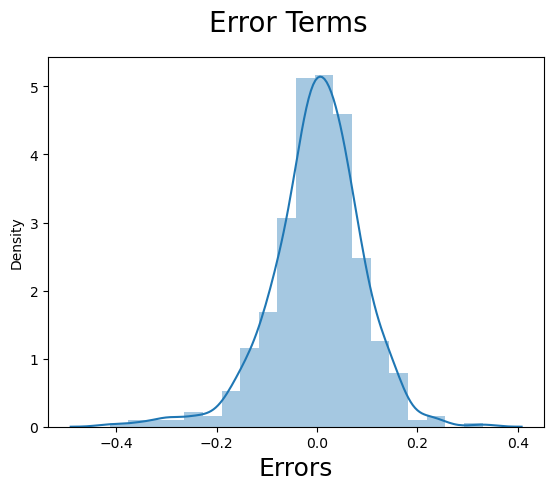

In [958]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### Multicollinearity

In [962]:
X_train_new = X_train_new_bk.copy()

In [964]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


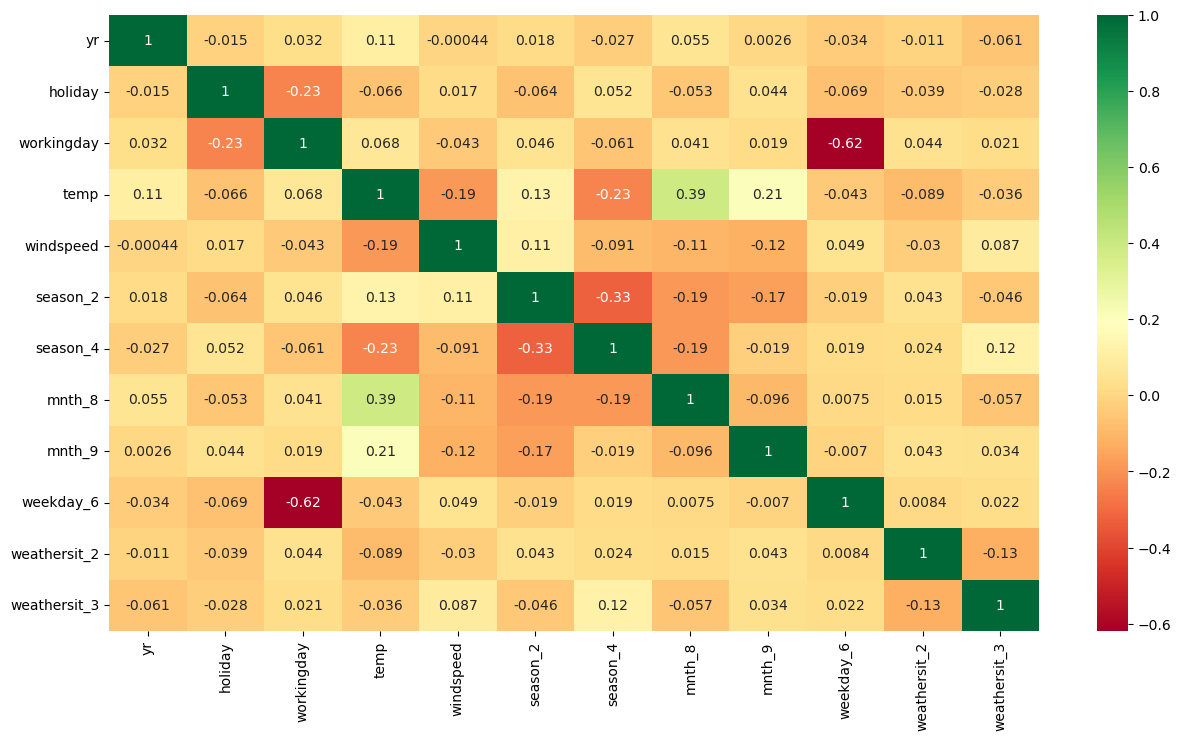

In [966]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### We can see that VIF for all the features except temp is below 5 and we can't exclude temp which is an important predictor variable as it contributes to r-squared significantly. The heatmap also shows multicollinearity within acceptable limits

#### Homoscedasticity

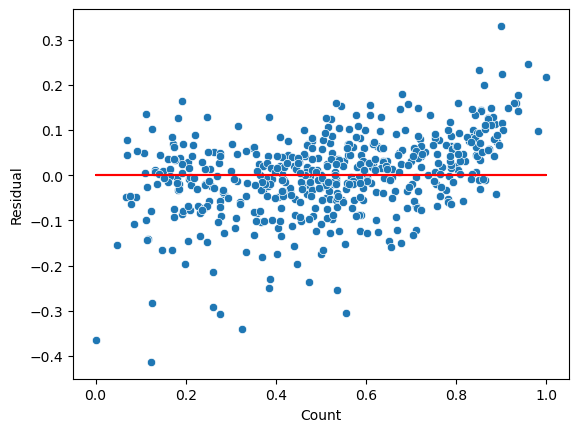

In [970]:
y_train_pred = lr4.predict(X_train_lm4)
residual = y_train - y_train_pred
# Create a DataFrame with the data for the scatterplot
scatter_data = pd.DataFrame({'Count': y_train, 'Residual': residual})

# Use the 'x' and 'y' parameters to specify the columns to plot
sns.scatterplot(x='Count', y='Residual', data=scatter_data)

plt.plot(y_train, (y_train - y_train), '-r')  # Plot the red line
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Independence of residuals
Durbin-Watson value of final model lr_4 is 2.074, which signifies there is no autocorrelation.

# PREDICTION USING FINAL MODEL



### Applying the scaling on the test sets

In [975]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [978]:
y_test = df_test.pop('cnt')
X_test = df_test



In [980]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   workingday    220 non-null    int64  
 4   temp          220 non-null    float64
 5   windspeed     220 non-null    float64
 6   season_2      220 non-null    int32  
 7   season_4      220 non-null    int32  
 8   mnth_8        220 non-null    int32  
 9   mnth_9        220 non-null    int32  
 10  weekday_6     220 non-null    int32  
 11  weathersit_2  220 non-null    int32  
 12  weathersit_3  220 non-null    int32  
dtypes: float64(3), int32(7), int64(3)
memory usage: 18.0 KB


In [982]:
# Making predictions using the final model

y_pred = lr4.predict(X_test_lm4)

## MODEL EVALUATION

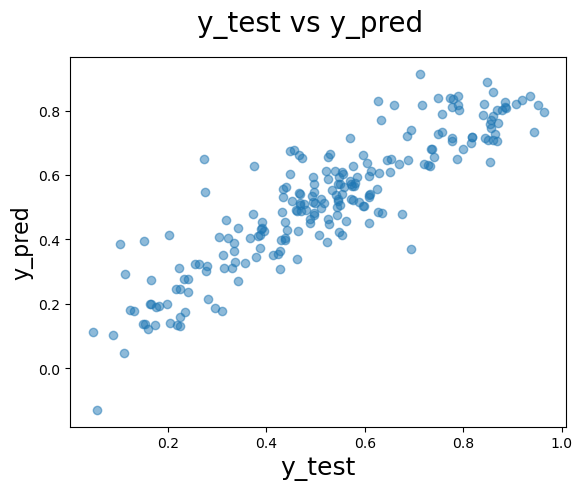

In [985]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### R^2 Value for TEST

In [988]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7974599854948248

In [990]:
r2=0.7974599854948248

### Adjusted R^2 Value for TEST

In [993]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857185353785827

### Comparison

- Train R^2 :0.840
- Train Adjusted R^2 :0.836
- Test R^2 :0.798
- Test Adjusted R^2 :0.789
- This seems to be a really good model that can very well 'Generalize' various datasets.

#### Demand of the bike depend on -
yr, holiday, workingday, temp, windspeed, season2, season 4, mnth8, mnth9, weekday6, weathersit2 and weathersit3

out of these  windspeed, holiday, weathersit2 and weathersit3 negatively impact the demand of the bike

cnt = 0.090297 + (**yr** × 0.232711) - (**holiday** × 0.056011)+ (**workingday** × 0.046317) + (**temp** × 0.518828) − (**windspeed** × 0.150835) + (**season2** × 0.100362) + (**season4** ×0.138202) + (**mnth8** × 0.050952) + (**mnth9** × 0.113626) + (**weekday6** ×0.056927) - (**weathersit_2** × 0.083049) − (**weathersit3** × 0.287225)